This file helps to summarize the output files over several runs.
It plots the train and prediction datasets of multiple runs in one large pdf file.

In [1]:
# script to run deepmod for ODEs

# General imports
import numpy as np
import matplotlib.pylab as plt
import os
import pandas as pd
import re

In [2]:
# load folder directory of batch
batch = "batch_10-03_3DLV"
# batch = "batch_10-02_miaSimS4"
out_dir = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster/{batch}/"

# set the run specifications
n_taxa = 3
# hl_number = 20
# hl_size = 60
# th = "0_001"

# list files in batch run
os.listdir(out_dir)

['output_batch_10-03_3DLV_run01_10_100_th0_001',
 'output_batch_10-03_3DLV_run01_10_100_thNo',
 'output_batch_10-03_3DLV_run01_10_50_th0_001',
 'output_batch_10-03_3DLV_run01_10_50_thNo',
 'output_batch_10-03_3DLV_run01_20_100_th0_001',
 'output_batch_10-03_3DLV_run01_20_100_thNo',
 'output_batch_10-03_3DLV_run01_20_50_th0_001',
 'output_batch_10-03_3DLV_run01_20_50_thNo',
 'output_batch_10-03_3DLV_run01_50_100_th0_001',
 'output_batch_10-03_3DLV_run01_50_50_th0_001',
 'output_batch_10-03_3DLV_run01_50_50_thNo',
 'output_batch_10-03_3DLV_run01_5_100_th0_001',
 'output_batch_10-03_3DLV_run01_5_100_thNo',
 'output_batch_10-03_3DLV_run01_5_50_th0_001',
 'output_batch_10-03_3DLV_run01_5_50_thNo',
 'output_batch_10-03_3DLV_run02_10_100_th0_001',
 'output_batch_10-03_3DLV_run02_10_100_thNo',
 'output_batch_10-03_3DLV_run02_10_50_th0_001',
 'output_batch_10-03_3DLV_run02_10_50_thNo',
 'output_batch_10-03_3DLV_run02_20_100_th0_001',
 'output_batch_10-03_3DLV_run02_20_100_thNo',
 'output_batch_

### Summarize over certain scenarios

Given a certain scenario specified by 

* number and size of hidden layers and 
* the threshold value,

the following script searches for all files (or runs) that satisfy these specifications and searches for the "data_train" and "prediction" tables in each outputs.

Then it creates plots out of the data and saves all plots of one scenario in one file "predictions_{batch}_{hl_number}_{hl_size}_th{th}.pdf".

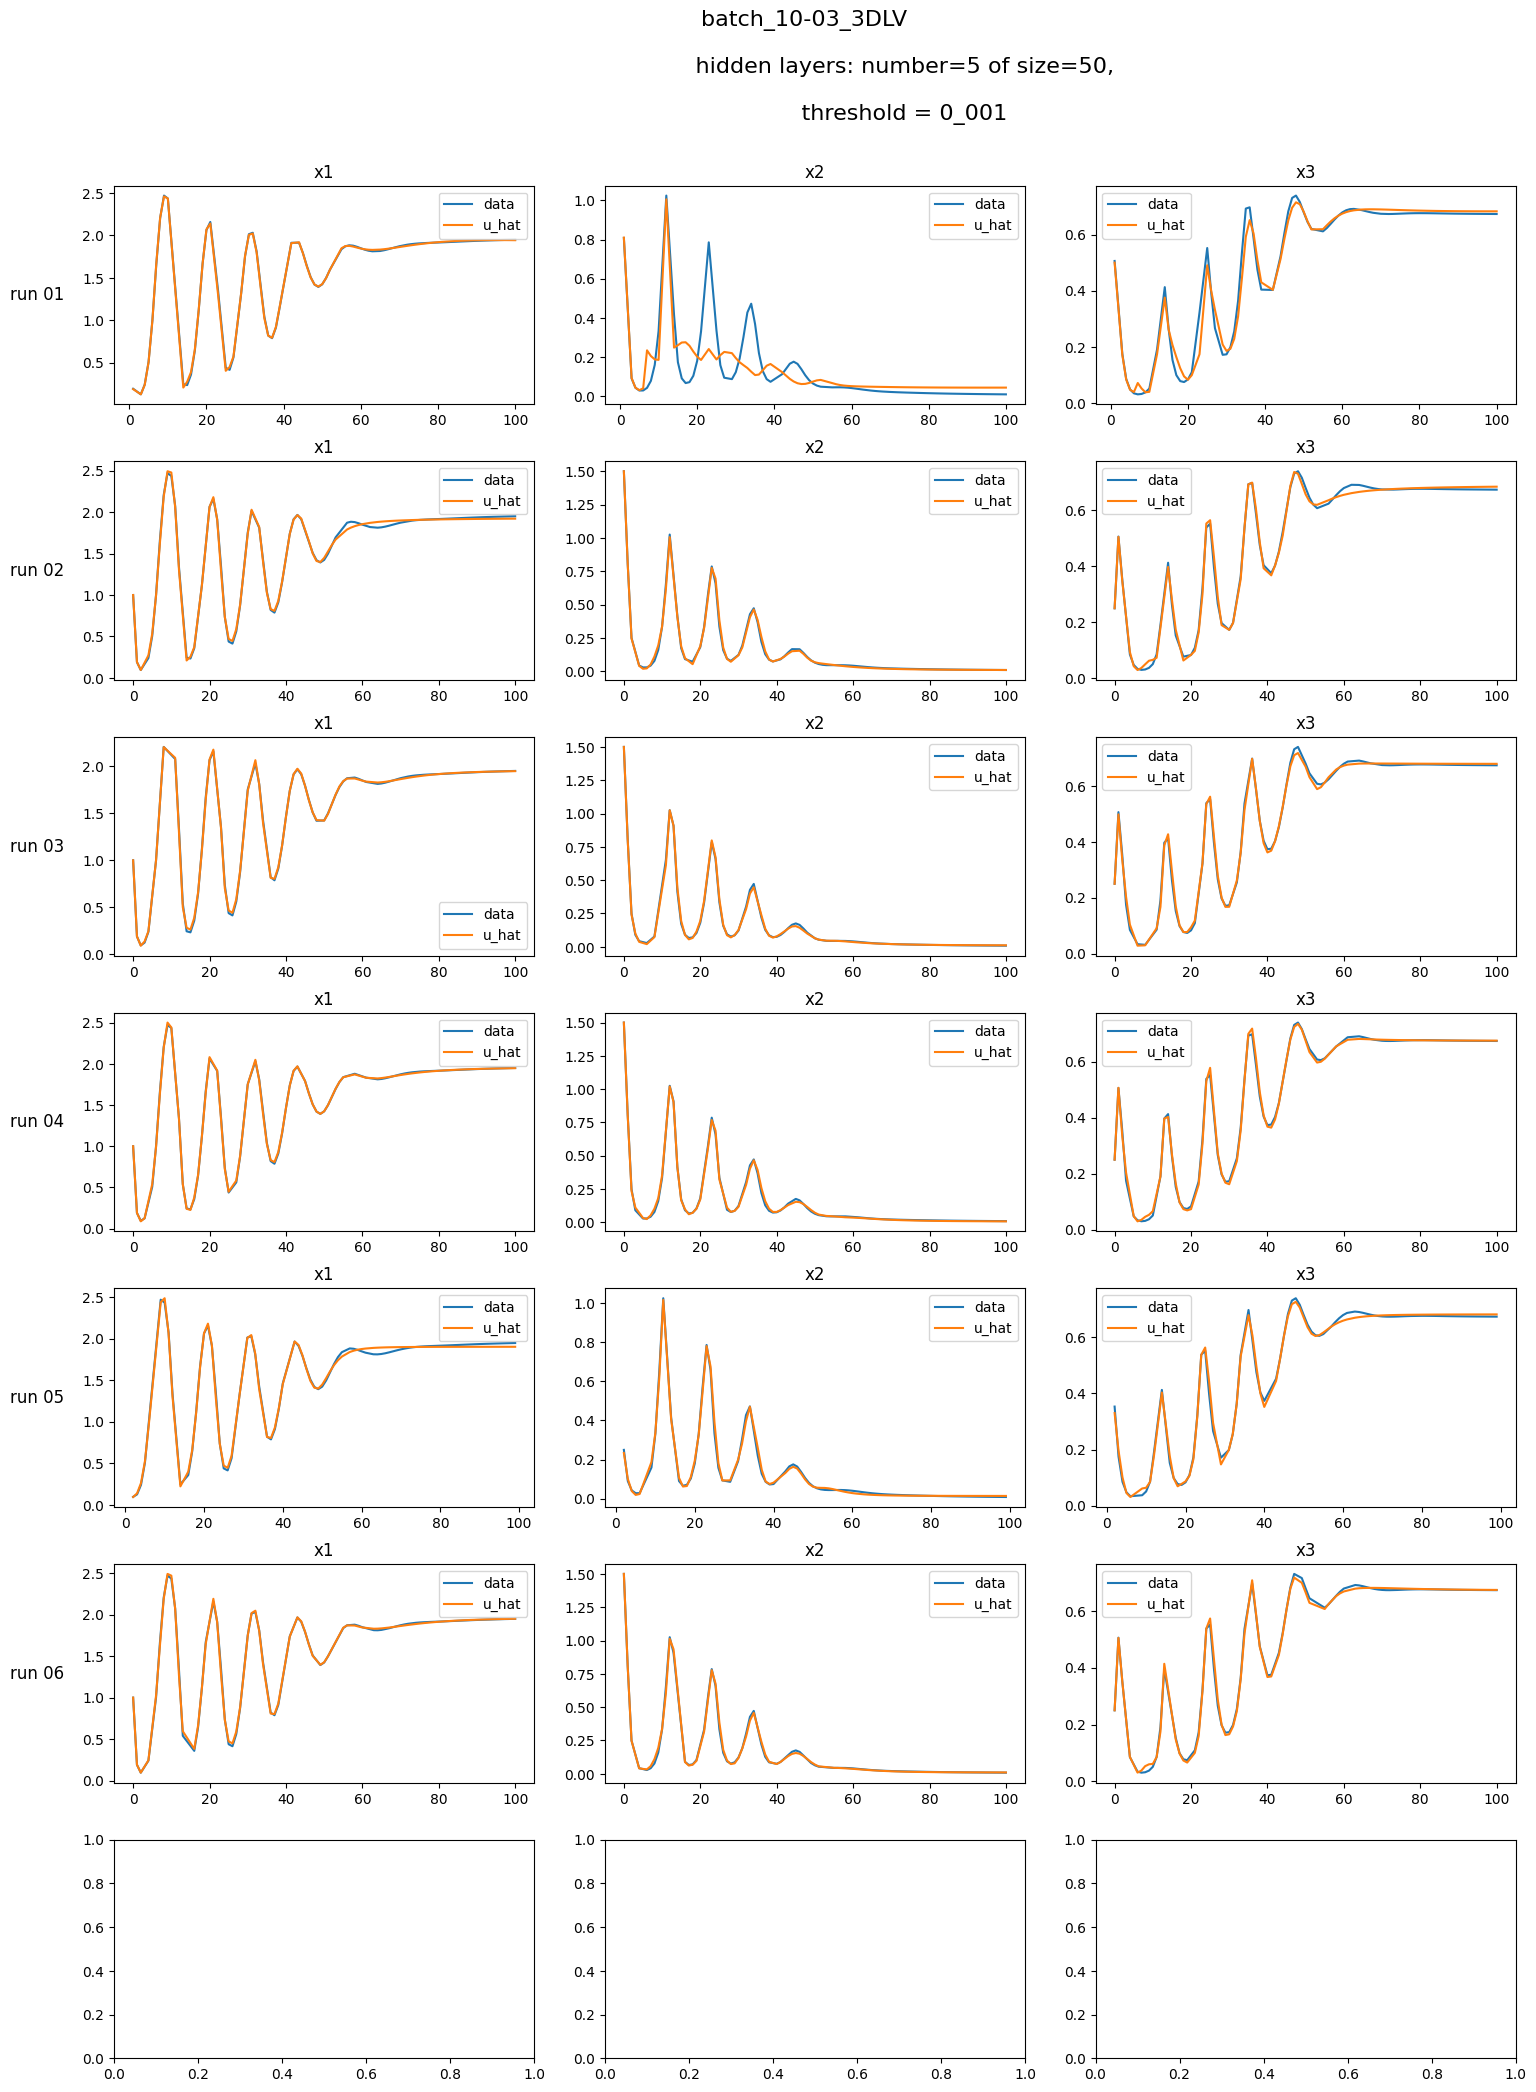

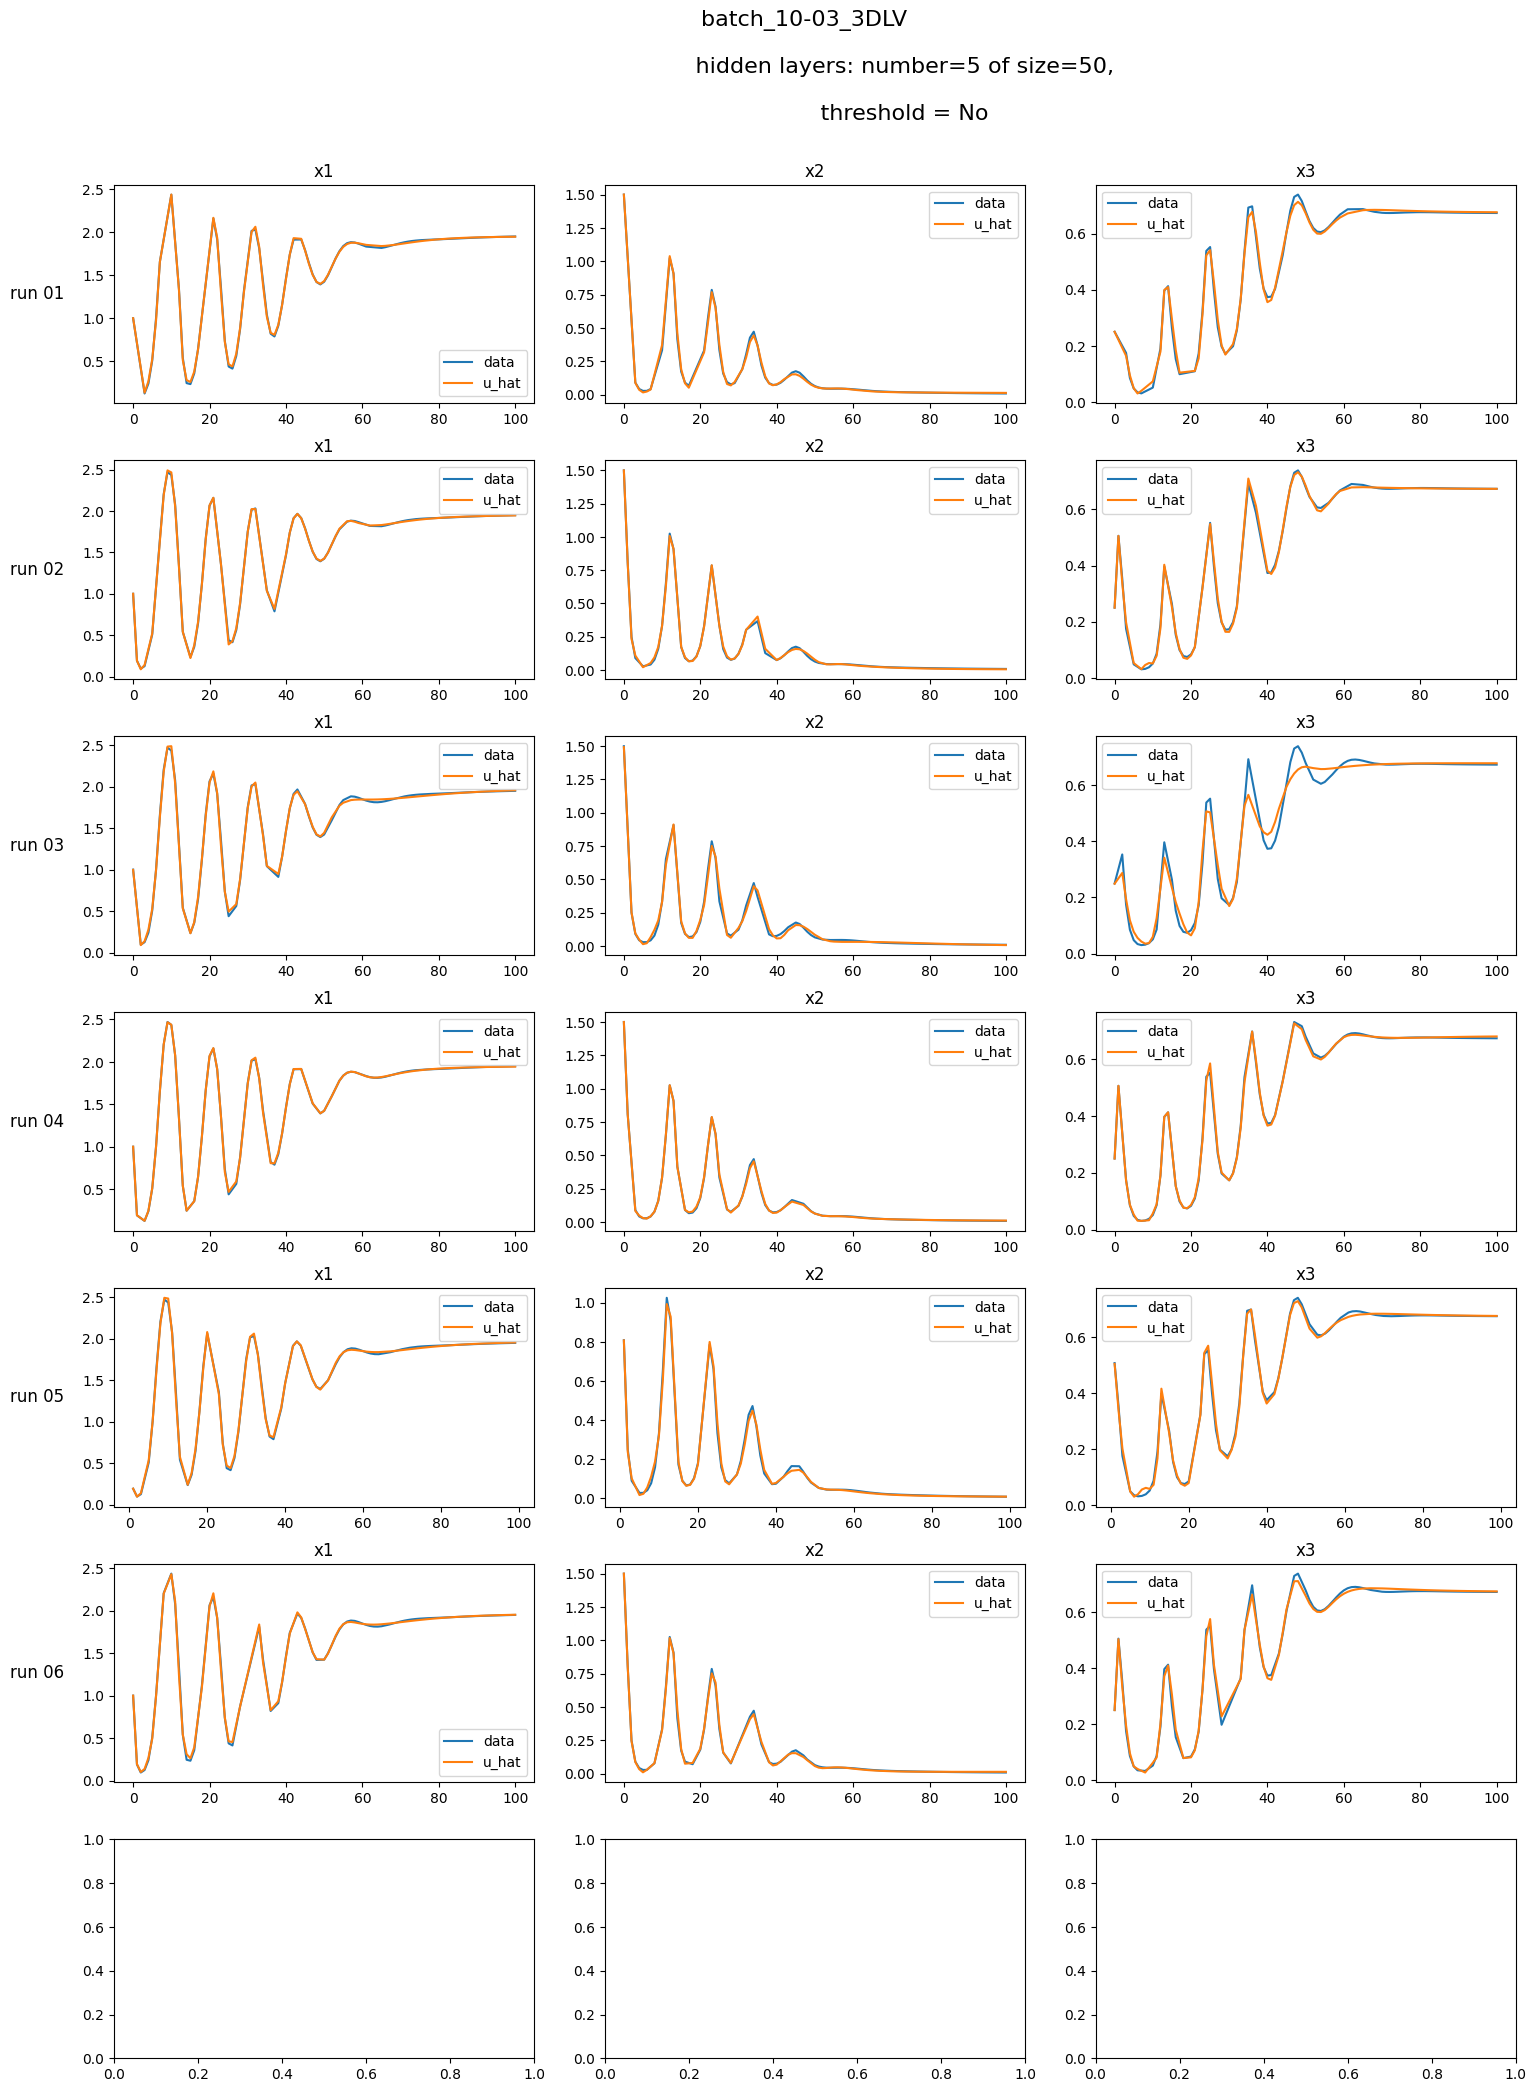

In [16]:
for hl_number in [5, 10, 20, 50]: #
    for hl_size in [50, 100]: #
        for th in ["0_001", "No"]: # "0_1", "0_01", 
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if f'_{hl_number}_{hl_size}_th{th}' in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))

            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # set plot dimensions
                n_row = max(n_runs, 2)
                n_col = n_taxa

                # make plot
                fig, axs = plt.subplots(n_row, n_col)
                fig.set_figwidth(15)
                fig.set_figheight(3*n_row)
                fig.suptitle(f"""{batch}\n
                            hidden layers: number={hl_number} of size={hl_size},\n
                            threshold = {th}""",
                            size=16, y=1.0)
                fig.tight_layout(pad=2.0)
                y = 0
                for run in runs:
                    plot_path_tmp = f"{out_dir}output_{batch}_run{run}_{hl_number}_{hl_size}_th{th}/Data/"
                    if os.path.exists(f"{plot_path_tmp}prediction_x1.csv"):
                        for taxon in np.arange(1,(n_taxa+1)):
                            # read data files
                            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                            # convert files to numpy array
                            data_train = np.array(df_data_train)
                            pred = np.array(df_pred)
                            # make plot
                            axs[int(y/n_col), (taxon-1)].plot(data_train[:,1], data_train[:,0], label = "data")
                            axs[int(y/n_col), (taxon-1)].plot(pred[:,1], pred[:,0], label = "u_hat")
                            axs[int(y/n_col), (taxon-1)].legend()
                            axs[int(y/n_col), (taxon-1)].set_title(f"x{taxon}")
                            # axs[int(y/n_col), (taxon-1)].set_ylim([-0.05, 0.5])
                            y += 1
                        axs[int((y-n_taxa)/n_col), 0].annotate(f"run {run}", xy=(0, 0.5), 
                                                        xytext=(-axs[int((y-n_taxa)/n_col), 0].yaxis.labelpad - 5, 0),
                                xycoords=axs[int((y-n_taxa)/n_col), 0].yaxis.label, textcoords='offset points',
                                size='large', ha='right', va='center')
                # save plots in one file
                plt.savefig(f'{out_dir}/predictions_{batch}_{hl_number}_{hl_size}_th{th}.pdf',
                            bbox_inches='tight', dpi = 200)
                plt.close()